**TASK-1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**DATA LOADING**

In [ ]:

sample_sales=pd.read_csv("sample_sales_data.csv")
sample_sales.drop(columns=["Unnamed: 0"], inplace=True, errors= 'ignore')
sample_sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


**EXPLORATORY DATA ANALYSIS**

In [ ]:
sample_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
sample_sales.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


<Axes: >

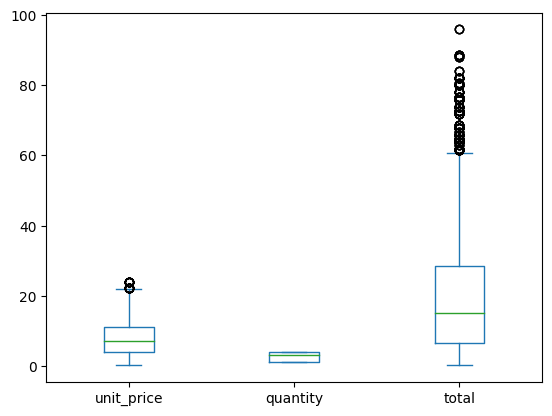

In [ ]:
sample_sales.plot(kind= 'box')

<Axes: ylabel='Frequency'>

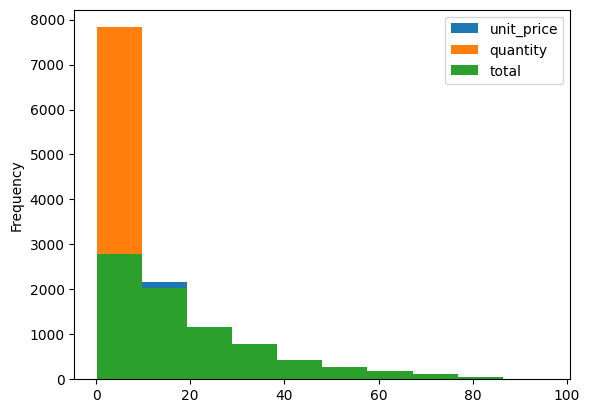

In [ ]:
sample_sales.plot(kind='hist', bins=10)

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

plot_continuous_distribution = this is to visualise the distribution of numeric columns
get_unique_values = this is to show how many unique values are present within a column
plot_categorical_distribution = this is to visualise the distribution of categorical columns
correlation_plot = this is to plot the correlations between the numeric columns
within the data





In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: list = None, height: int = 5):
  for i in column:
    sns.displot(data, x=i, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}')

In [ ]:
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

In [ ]:

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}')


In [ ]:
def correlation_plot(data: pd.DataFrame = None):
  corr = data.corr()
  sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

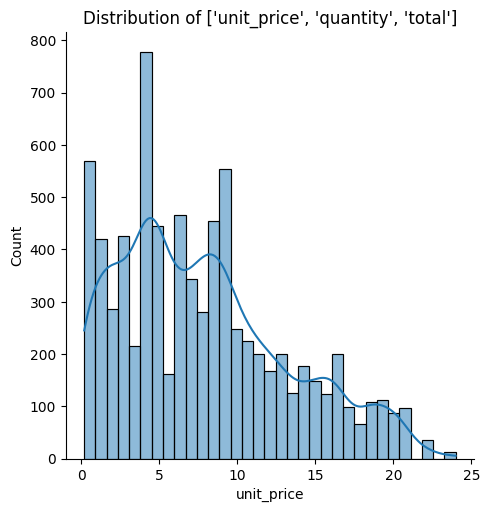

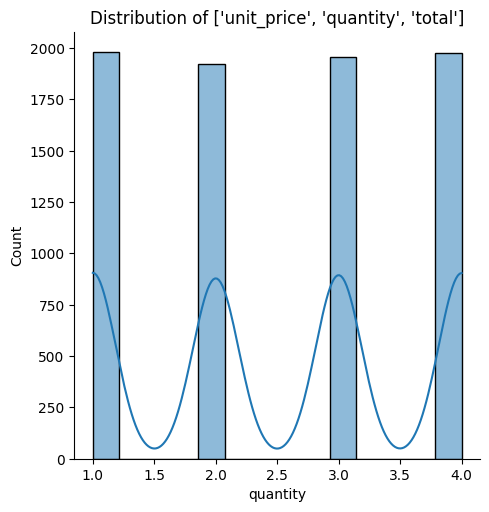

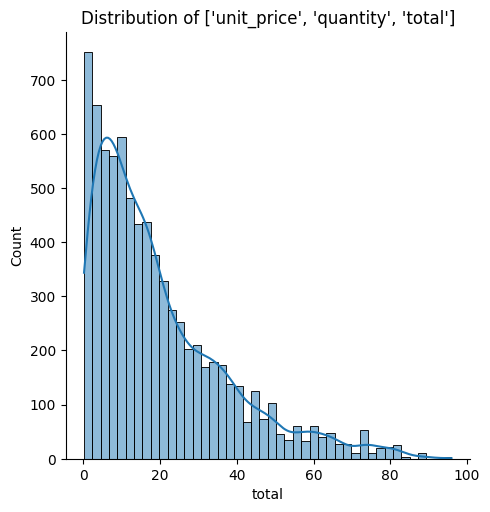

In [ ]:
plot_continuous_distribution(sample_sales, ['unit_price', 'quantity', 'total'])



*   The continuous distribution plot of unit price seems to be right-skewed i.e. more data points are clustured towards left and the right tail is longer. This means that the items with less unit price (cheaper items) are sold more compared to the expensive items.
*   The continuous distribution plot of the quantity seems evenly distributed having 4 distinct values (1, 2, 3, 4). This means that the equal quantity of products is sold across all 4 values.
*   Again, the continuous distribution plot of total purchase seems to be perfectly right-skewed which is in sync with the unit price. This means that the customers usually make smaller transactions and occasionally make bigger transactions.






In [ ]:
get_unique_values(sample_sales, 'category')
get_unique_values(sample_sales, 'customer_type')
get_unique_values(sample_sales, 'payment_type')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64
Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64
Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918




*   There are 22 unique categories of the products in the dataset and large number of products belong to fruit and vegetables categories.
*   Most customers purchasing from this grocery store are non-members but the numbers in each group are more or less the same.
*   Most customers pay by cash but the overall distribution among payment types seems almost even.





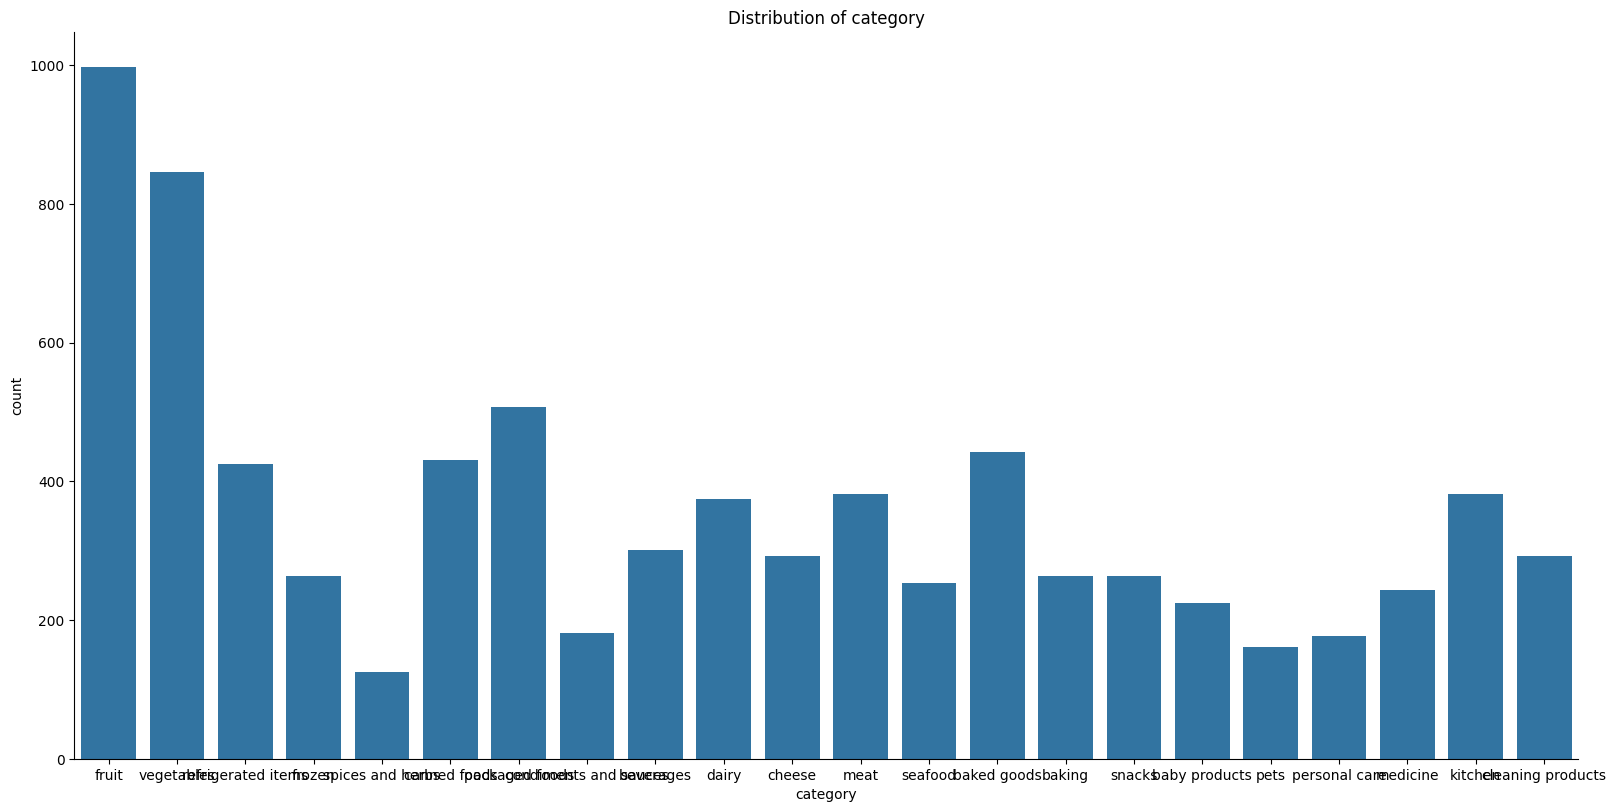

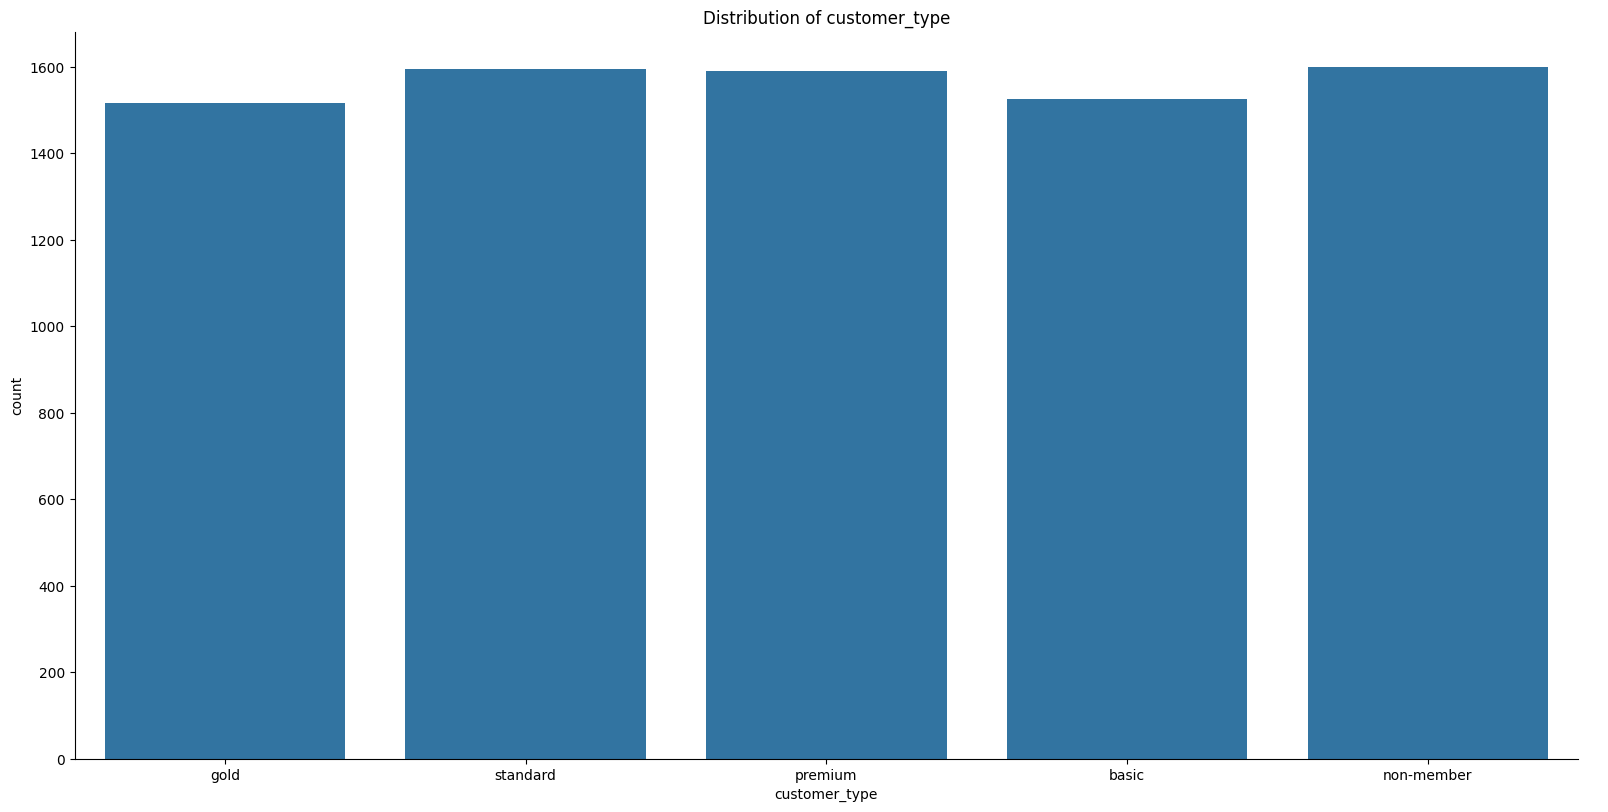

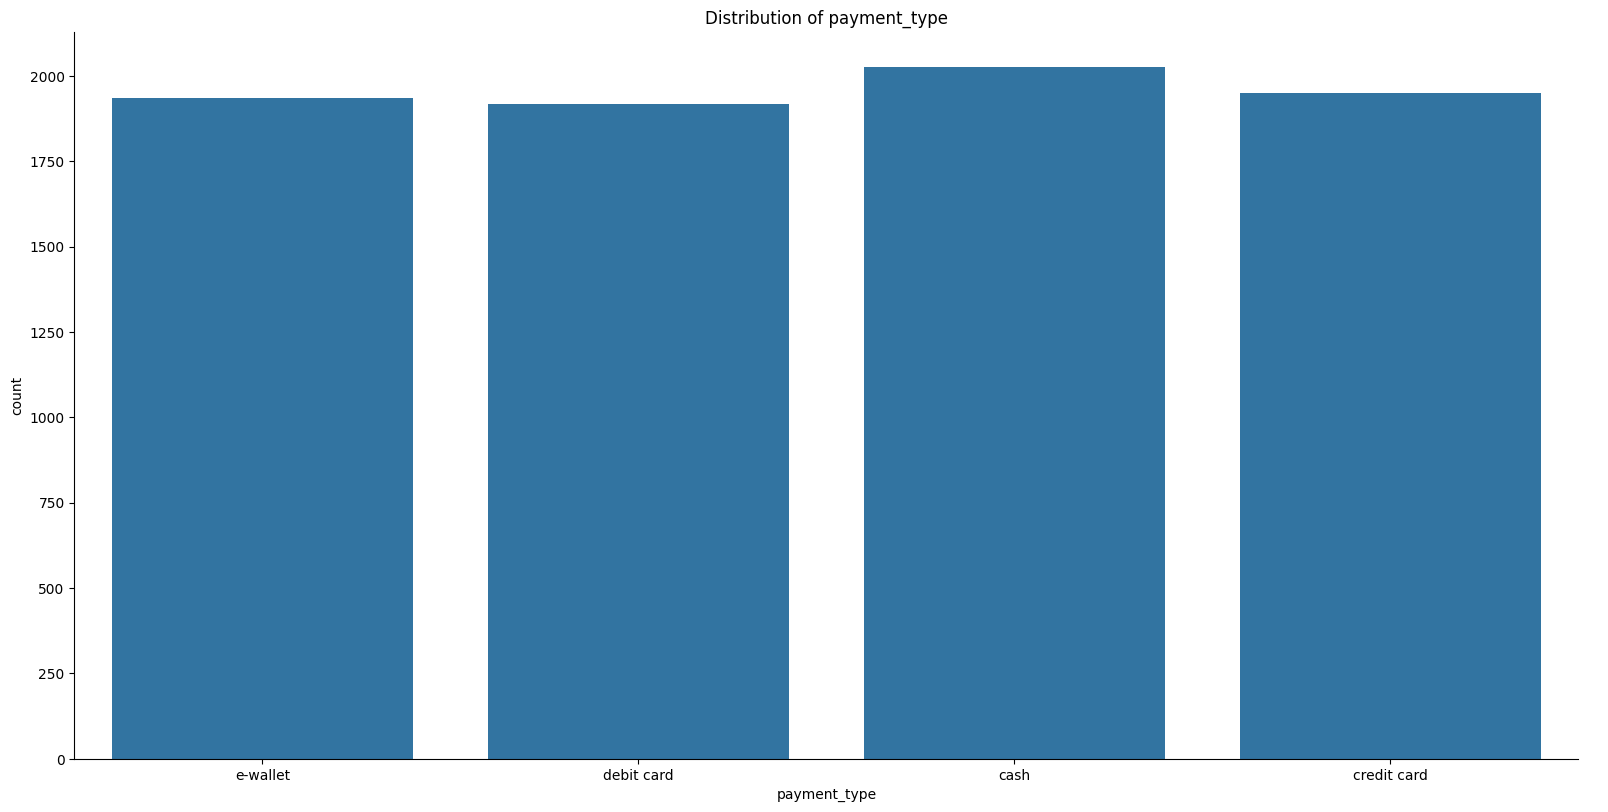

In [ ]:
plot_categorical_distribution(sample_sales, 'category')
plot_categorical_distribution(sample_sales, 'customer_type')
plot_categorical_distribution(sample_sales, 'payment_type')

[Text(0.5, 1.0, 'Distribution of Category')]

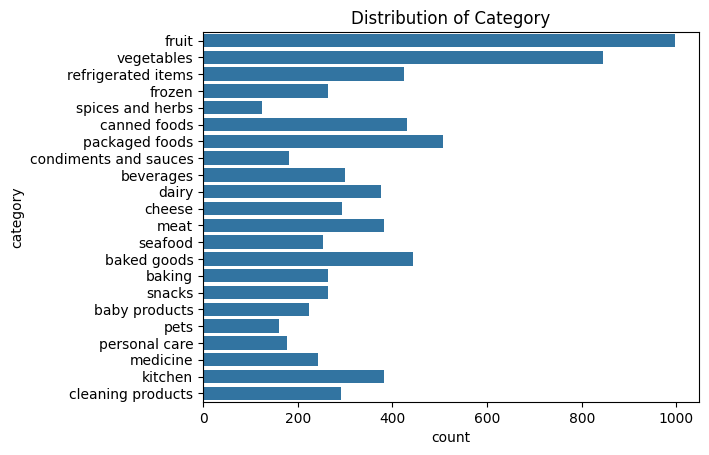

In [ ]:
sns.countplot(sample_sales, y='category').set(title=f'Distribution of Category')

<ipython-input-10-284e0859fd92>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


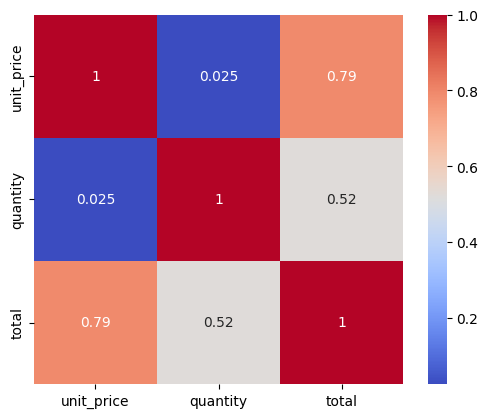

In [ ]:
correlation_plot(sample_sales)

**SUMMARY**
We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

"How to better stock the items that they sell":

We need more rows of data. The current sample is only from 1 store and 1 week worth of data
We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

**TASK-3: MODEL BUILDING**



In [ ]:
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
sales_df=pd.read_csv("sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_df=pd.read_csv("sensor_stock_levels.csv")
stock_df.drop(columns=['Unnamed: 0'], inplace=True)
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
temp_df=pd.read_csv("sensor_storage_temperature.csv")
temp_df.drop(columns=['Unnamed: 0'], inplace=True)
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


**Data cleaning**

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy


In [ ]:
sales_df = convert_to_datetime(sales_df, 'timestamp')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [ ]:
stock_df = convert_to_datetime(stock_df, 'timestamp')
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [ ]:
temp_df = convert_to_datetime(temp_df, 'timestamp')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


**merge data**

In [ ]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [ ]:
sales_df = convert_timestamp_to_hourly(sales_df, 'timestamp')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_df = convert_timestamp_to_hourly(stock_df, 'timestamp')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
temp_df = convert_timestamp_to_hourly(temp_df, 'timestamp')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [ ]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [ ]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [ ]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


In [ ]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [ ]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [ ]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [ ]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [ ]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [ ]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


**Feature Engineering**

In [ ]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [ ]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   timestamp_day_of_month          10845 non-null  int64  
 6   timestamp_day_of_week           10845 non-null  int64  
 7   timestamp_hour                  10845 non-null  int64  
 8   category_baby products          10845 non-null  uint8  
 9   category_baked goods            10845 non-null  uint8  
 10  category_baking                 10845 non-null  uint8  
 11  category_beverages              10845 non-null  uint8  
 12  category_canned foods           

In [ ]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Modelling**

In [ ]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


In [ ]:
K = 10
split = 0.75

In [ ]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.237
Fold 2: MAE = 0.238
Fold 3: MAE = 0.236
Fold 4: MAE = 0.236
Fold 5: MAE = 0.236
Fold 6: MAE = 0.237
Fold 7: MAE = 0.237
Fold 8: MAE = 0.236
Fold 9: MAE = 0.236
Fold 10: MAE = 0.236
Average MAE: 0.24


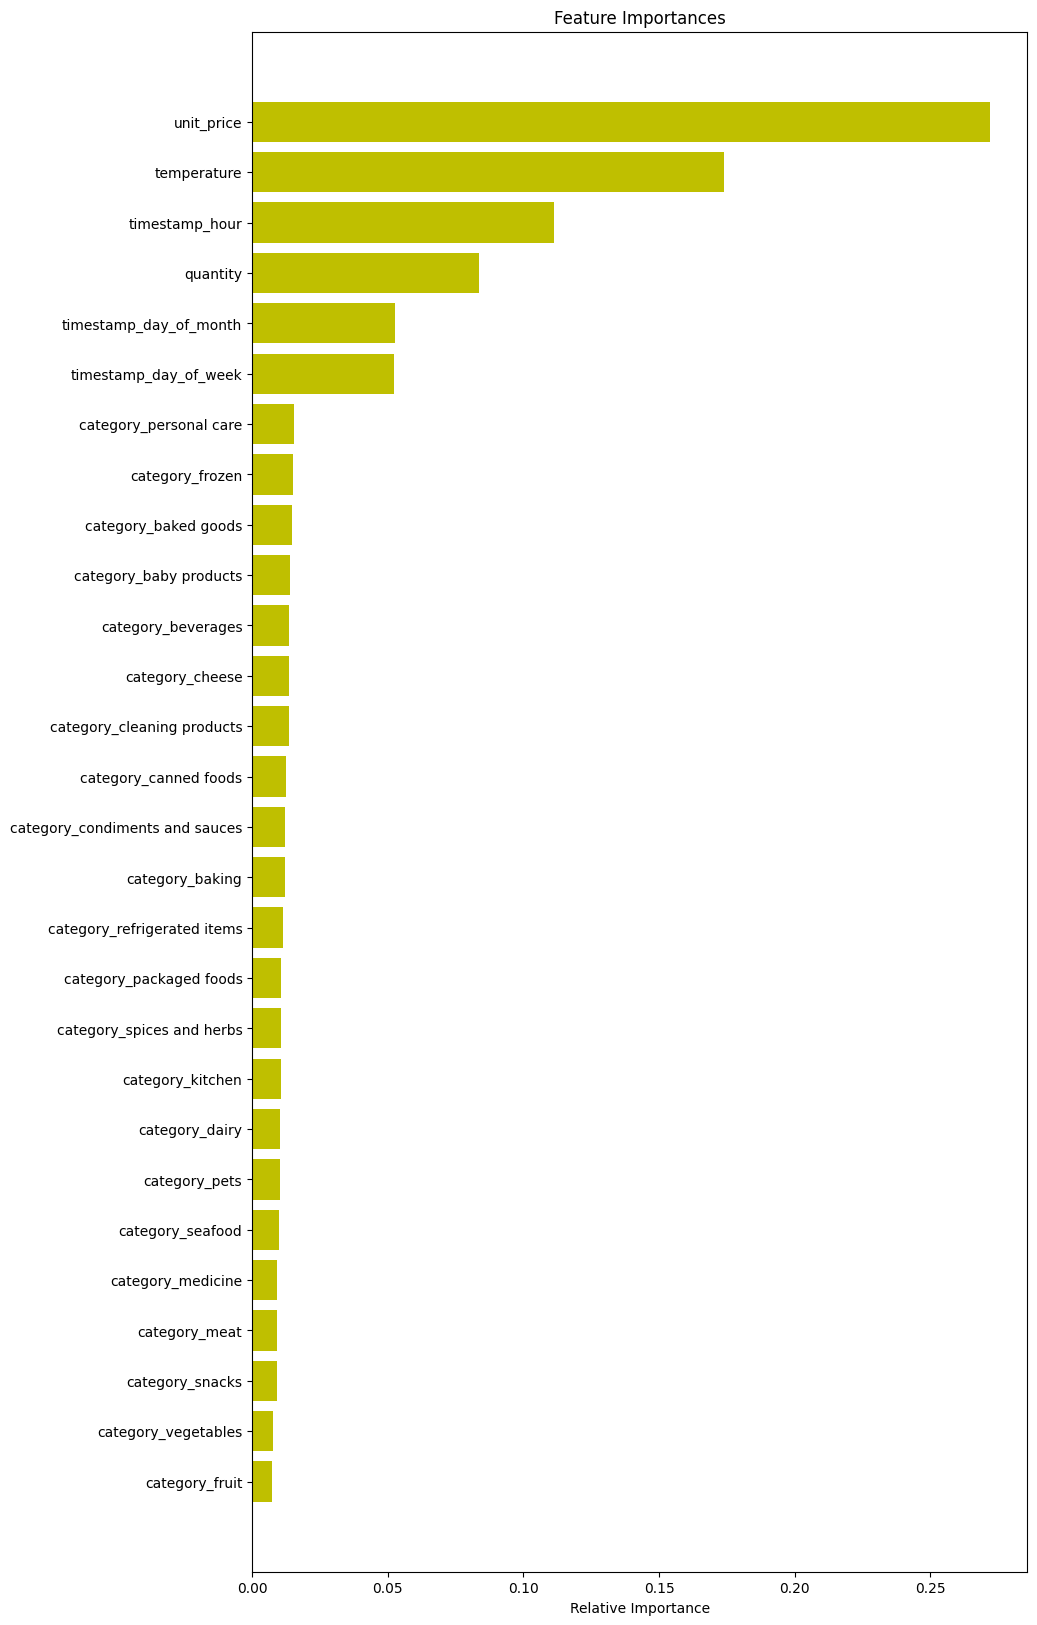

In [ ]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This feature importance visualisation tells us:

The product categories were not that important
The unit price and temperature were important in predicting stock
The hour of day was also important for predicting stock

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Define a list of models to try
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Perform cross-validation and hyperparameter tuning for each model
for name, model in models.items():
    print(f"Evaluating {name}")

    # Define hyperparameters for grid search
    param_grid = {}
    if name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    elif name == 'Support Vector Machine':
        param_grid = {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)

    # Get the best model and its performance
    best_model = grid_search.best_estimator_
    best_score = -grid_search.best_score_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Cross-validation MAE: {best_score:.3f}")

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    print(f"Test set MAE: {test_mae:.3f}")
    print()


--------------------------------------------------------------------------------

Evaluating Linear Regression
Best parameters: {}
Cross-validation MAE: 0.223
Test set MAE: 0.222

Evaluating Random Forest
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Cross-validation MAE: 0.224
Test set MAE: 0.223

Evaluating Support Vector Machine
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validation MAE: 0.224
Test set MAE: 0.222



Training set MAE: 0.150


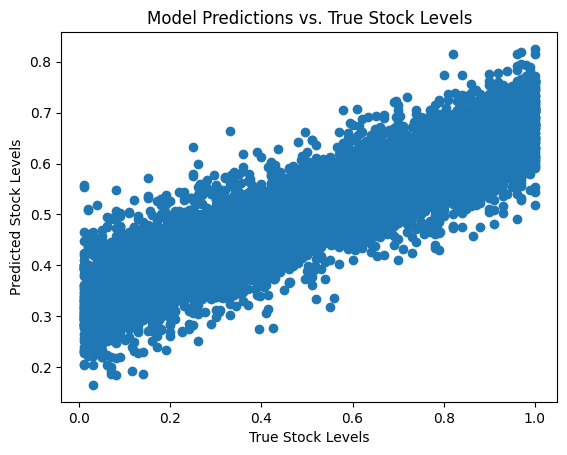

Feature Importances:
unit_price: 0.269
temperature: 0.184
timestamp_hour: 0.110
quantity: 0.095
timestamp_day_of_week: 0.046
timestamp_day_of_month: 0.046
category_personal care: 0.015
category_beverages: 0.014
category_cheese: 0.014
category_frozen: 0.014
category_baked goods: 0.013
category_cleaning products: 0.013
category_baby products: 0.013
category_baking: 0.012
category_condiments and sauces: 0.012
category_canned foods: 0.012
category_seafood: 0.011
category_medicine: 0.011
category_kitchen: 0.011
category_refrigerated items: 0.011
category_spices and herbs: 0.010
category_packaged foods: 0.010
category_meat: 0.010
category_snacks: 0.010
category_dairy: 0.009
category_pets: 0.009
category_vegetables: 0.008
category_fruit: 0.008


In [ ]:
# Train the best-performing model on the entire training data
best_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5)  # Example parameters
best_model.fit(X_train, y_train)

# Evaluate model performance
from sklearn.metrics import mean_absolute_error
y_pred_train = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
print(f"Training set MAE: {train_mae:.3f}")

# Visualize model predictions
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("True Stock Levels")
plt.ylabel("Predicted Stock Levels")
plt.title("Model Predictions vs. True Stock Levels")
plt.show()

# Feature Importance Analysis
features = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature Importances:")
for i in range(len(features)):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.3f}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define the Random Forest Regressor model with the best parameters
best_rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Compute the mean absolute error (MAE) to evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Test set MAE: {mae:.3f}")


Test set MAE: 0.223


In [ ]:
# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Combine predicted values and true values into a DataFrame for easier comparison
results_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Print the first few rows of the DataFrame
print(results_df.head())


      True Values  Predicted Values
2018        0.060          0.501325
1669        0.330          0.486932
6899        0.870          0.498954
5133        0.300          0.520636
360         0.485          0.524604


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Define the SVM model with the best parameters
best_svm_model = SVR(kernel='linear', C=10, gamma='scale')

# Train the model on the training data
best_svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svm_model.predict(X_test)

# Compute the mean absolute error (MAE) to evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Test set MAE: {mae:.3f}")


Test set MAE: 0.222


In [ ]:
# Make predictions on the test data
y_pred = best_svm_model.predict(X_test)

# Combine predicted values and true values into a DataFrame for easier comparison
results_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Print the first few rows of the DataFrame
print(results_df.head())


      True Values  Predicted Values
2018        0.060          0.517668
1669        0.330          0.513376
6899        0.870          0.528613
5133        0.300          0.476539
360         0.485          0.501325


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Define the Linear Regression model with the best parameters
best_linear_model = LinearRegression()

# Train the model on the training data
best_linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_linear_model.predict(X_test)

# Compute the mean absolute error (MAE) to evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Test set MAE: {mae:.3f}")


Test set MAE: 0.222


In [ ]:
# Make predictions on the test data
y_pred = best_linear_model.predict(X_test)

# Combine predicted values and true values into a DataFrame for easier comparison
results_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Print the first few rows of the DataFrame
print(results_df.head())


      True Values  Predicted Values
2018        0.060          0.512146
1669        0.330          0.513122
6899        0.870          0.518493
5133        0.300          0.487243
360         0.485          0.495544


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost Regressor model
xgb_model = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],             # Maximum depth of trees
    'learning_rate': [0.05, 0.1, 0.2]   # Learning rate
}

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_absolute_error')
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model and its performance
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_score = -grid_search_xgb.best_score_
print(f"Best parameters: {grid_search_xgb.best_params_}")
print(f"Cross-validation MAE: {best_xgb_score:.3f}")


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Cross-validation MAE: 0.223


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define hyperparameters for grid search
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors
    'weights': ['uniform', 'distance']  # Weighting scheme
}

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='neg_mean_absolute_error')
grid_search_knn.fit(X_train, y_train)

# Get the best KNN model and its performance
best_knn_model = grid_search_knn.best_estimator_
best_knn_score = -grid_search_knn.best_score_
print(f"Best parameters: {grid_search_knn.best_params_}")
print(f"Cross-validation MAE: {best_knn_score:.3f}")


Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Cross-validation MAE: 0.236


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the LightGBM Regressor model
lgb_model = lgb.LGBMRegressor()

# Define hyperparameters for grid search
param_grid_lgb = {
    'n_estimators': [100, 200, 300],   # Number of boosting rounds
    'max_depth': [3, 5, 7],             # Maximum depth of trees
    'learning_rate': [0.05, 0.1, 0.2]   # Learning rate
}

# Perform grid search with cross-validation
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5, scoring='neg_mean_absolute_error')
grid_search_lgb.fit(X_train, y_train)

# Get the best LightGBM model and its performance
best_lgb_model = grid_search_lgb.best_estimator_
best_lgb_score = -grid_search_lgb.best_score_
print(f"Best parameters: {grid_search_lgb.best_params_}")
print(f"Cross-validation MAE: {best_lgb_score:.3f}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the CatBoost Regressor model
catboost_model = CatBoostRegressor()

# Define hyperparameters for grid search
param_grid_catboost = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'depth': [3, 5, 7],              # Depth of trees
    'learning_rate': [0.05, 0.1, 0.2] # Learning rate
}

# Perform grid search with cross-validation
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, cv=5, scoring='neg_mean_absolute_error')
grid_search_catboost.fit(X_train, y_train)

# Get the best CatBoost model and its performance
best_catboost_model = grid_search_catboost.best_estimator_
best_catboost_score = -grid_search_catboost.best_score_
print(f"Best parameters: {grid_search_catboost.best_params_}")
print(f"Cross-validation MAE: {best_catboost_score:.3f}")


Streaming output truncated to the last 5000 lines.
2:	learn: 0.2635760	total: 5.43ms	remaining: 356ms
3:	learn: 0.2633034	total: 7.33ms	remaining: 359ms
4:	learn: 0.2629295	total: 9.28ms	remaining: 362ms
5:	learn: 0.2625329	total: 11.3ms	remaining: 366ms
6:	learn: 0.2623077	total: 13.2ms	remaining: 363ms
7:	learn: 0.2618554	total: 15.2ms	remaining: 364ms
8:	learn: 0.2616452	total: 17ms	remaining: 360ms
9:	learn: 0.2614916	total: 18.8ms	remaining: 358ms
10:	learn: 0.2611388	total: 20.8ms	remaining: 358ms
11:	learn: 0.2609092	total: 22.8ms	remaining: 357ms
12:	learn: 0.2605941	total: 24.6ms	remaining: 354ms
13:	learn: 0.2603067	total: 26.4ms	remaining: 351ms
14:	learn: 0.2601461	total: 28.3ms	remaining: 349ms
15:	learn: 0.2598289	total: 30.2ms	remaining: 348ms
16:	learn: 0.2595899	total: 32.1ms	remaining: 345ms
17:	learn: 0.2593398	total: 34ms	remaining: 344ms
18:	learn: 0.2588527	total: 36.8ms	remaining: 350ms
19:	learn: 0.2585489	total: 39ms	remaining: 351ms
20:	learn: 0.2582380	total: